In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [14]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 114MB/s]
100% 1.06G/1.06G [00:08<00:00, 130MB/s]


In [15]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D,Flatten, BatchNormalization, Dropout

In [17]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', 
    labels = 'inferred',
    label_mode = 'int', 
    batch_size = 32, 
    image_size = (256, 256)
)
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', 
    labels = 'inferred',
    label_mode = 'int', 
    batch_size = 32, 
    image_size = (256, 256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image, label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [26]:
#create CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))




In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
625/625 [==============================] - 73s 115ms/step - loss: 1.2071 - accuracy: 0.5989 - val_loss: 0.5971 - val_accuracy: 0.6786
Epoch 2/10
625/625 [==============================] - 72s 114ms/step - loss: 0.5457 - accuracy: 0.7273 - val_loss: 0.6242 - val_accuracy: 0.6200
Epoch 3/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4568 - accuracy: 0.7850 - val_loss: 0.4733 - val_accuracy: 0.7742
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4029 - accuracy: 0.8191 - val_loss: 0.4129 - val_accuracy: 0.8138
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3209 - accuracy: 0.8602 - val_loss: 0.4128 - val_accuracy: 0.8210
Epoch 6/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2453 - accuracy: 0.8969 - val_loss: 0.4873 - val_accuracy: 0.8202
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.1715 - accuracy: 0.9315 - val_loss: 0.5099 - val_ac

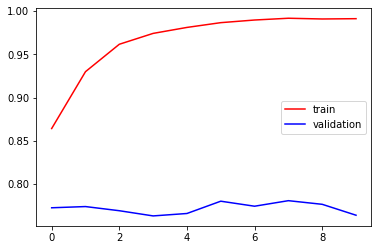

In [24]:
#before dropout and batchnormalization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

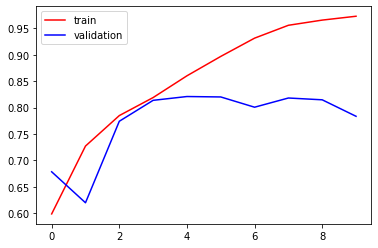

In [30]:
#after dropout and regularization
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

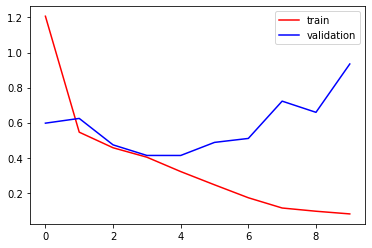

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [32]:
import cv2

In [50]:
test_img = cv2.imread('/content/dog1.JPG')

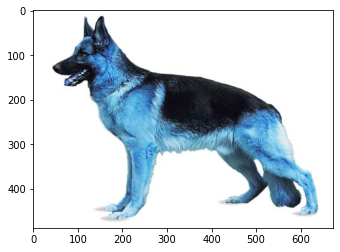

In [51]:
plt.imshow(test_img)

In [52]:
test_img.shape

(488, 674, 3)

In [53]:
test_img = cv2.resize(test_img, (256, 256))

In [54]:
test_input = test_img.reshape((1, 256, 256, 3))

In [55]:
model.predict(test_input)

1/1 [==============================] - 0s 21ms/step


array([[1.]], dtype=float32)